In [1]:
from classify_lib import *

In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Classify Symbols


## 1) Data From Kilian
### 1.1) Extract nb_object and total area

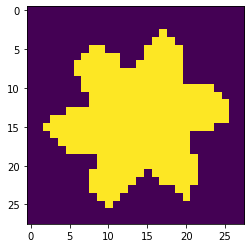

In [4]:
# Can be loaded using pickle and the following lines
with open('../extractedImg.data', 'rb') as dataFile:
	listObj = pickle.load(dataFile)
    
symbols = [listObj[i]['img'] for i in [2,3,6,9] ] #just keep the symbols (and discard the digits)
plt.imshow(symbols[0])

In [5]:
nb_objs, areas = [ None for i in symbols], [ None for i in symbols ]
for i in np.arange(len(symbols)):    
  nb_objs[i], areas[i] = compute_nb_objects(symbols[i])
  print(nb_objs[i], areas[i])

1 291
2 110
3 13
1 227


## 1.2) Extract Fourier Descriptor and Perimeter
Only for the +, -, * symbols 

NOTE !!!??? : pad picture with 0 to have bigger pictures

In [7]:
symbols[0].shape

(28, 28)

In [8]:
symbols[0][0,0]

False

In [9]:
# 1) Compute Fourier Descriptor
feats, snakes, ims = [ None for i in symbols],  [ None for i in symbols],  [ None for i in symbols]
feat = 2
feats[0], snakes[0], ims[0] = compute_feat_with_fourier_descriptor(symbols[0], feat)
feats[3], snakes[3], ims[3] = compute_feat_with_fourier_descriptor(symbols[3], feat)

print("diff = ", np.abs(feats[0]-feats[3]))

diff =  0.006926584573006728


In [29]:
# 2) Compute PERIMETER : #tested : it works well

perimeter(symbols[0]), perimeter(symbols[3])

(89.32590180780451, 79.698484809835)

NameError: name 'snake' is not defined

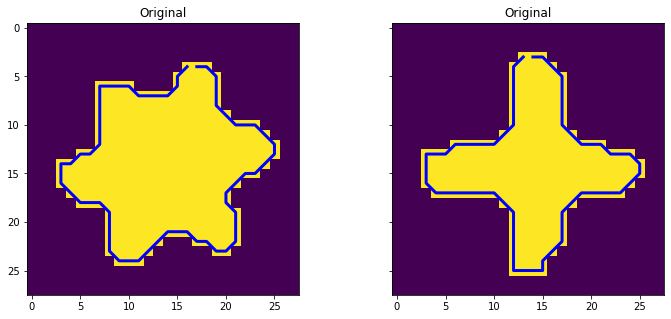

In [31]:
# ===============  display results : the contours are perfect !    ===============  

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True, sharey=True)
ax = axes.ravel()

feats[0], snakes[0], ims[0] = compute_feat_with_fourier_descriptor(symbols[0], feat)
feats[3], snakes[3], ims[3] = compute_feat_with_fourier_descriptor(symbols[3], feat)

ax[0].plot(snakes[0][:,1], snakes[0][:,0], '-b', lw=3)
ax[0].imshow(ims[0])
ax[0].set_title("Original")

ax[1].plot(snakes[3][:,1], snakes[3][:,0], '-b', lw=3)
ax[1].imshow(ims[3])
ax[1].set_title("Original")
print(snake.shape)

for a in ax:
    a.axis('off')
    

## try zero padding : don't change the results !

## 2) Data From Moodle : I want to use them to have a greater dataset (rather than the only video we have ! )


In [2]:
data_base_path = os.path.join(os.pardir, '..\\..\\data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)
    
data_path = os.path.join(data_base_path, data_folder)

###  First, I'm gonna reshape the data to increase the dataset of Kilian

(316, 1736, 4)


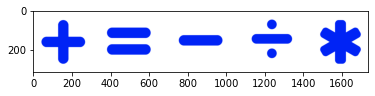

In [15]:
im = imageio.imread('../../data/original_operators.png')
print(im.shape)
plt.imshow(im[:,:,0:3])

(316, 1736)
(316, 348)


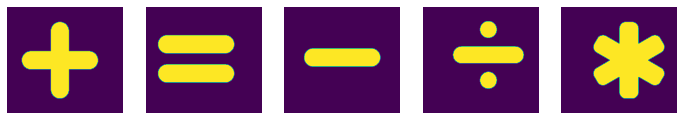

In [68]:
greyim = rgb2gray(rgba2rgb(im))
# or : greyim = rgb2gray(im[:,:,0:3])
print(greyim.shape)
#plt.imshow(greyim)

width = greyim.shape[1]//5+1
symbols = [ None for i in np.arange(5)]
for i in np.arange(5):
  symbols[i] = greyim[:,width*i:width*(i+1)]
  a = np.copy( symbols[i] )
  a[a<0.5] = False 
  a[a>0.5] = True
  symbols[i] = ~np.copy(a.astype(bool))
  
plot_pic( symbols )
print( symbols[0].shape)

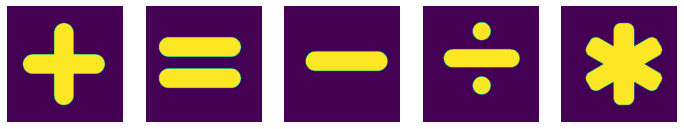

In [125]:
new_pics = np.zeros( (len(symbols), 320, 320) ).astype(bool)
shift_x = [0, 0, 0, 32, 28]
for i in np.arange(len(symbols)):
  new_pics[i][0:316,0:316] = symbols[i][0:316,0+shift_x[i]:316+shift_x[i]]
  
plot_pic( new_pics )

In [126]:
from skimage.transform import resize
from skimage.transform import rescale

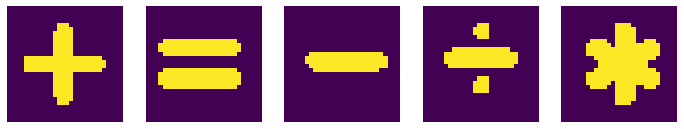

In [127]:
final_pic = [None for i in np.arange(len(symbols))]

for i in np.arange(len(symbols)):
  #new_pics[i] = resize( new_pics[i], (image.shape[0] //))
  final_pic[i] = rescale( new_pics[i], 0.088, anti_aliasing=False )
  
plot_pic( final_pic )

In [128]:
# IF NEEDED : I CAN ROTATE AND TRANSLATE THEM, but for now, let's keep what we have above

from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import SimilarityTransform

trans = np.array( [ [0,0], [-1,0], [-1,0] ] )

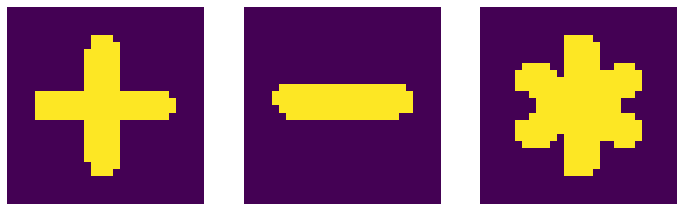

In [129]:
for idx, i in enumerate([0,2,4]):
  T = SimilarityTransform( translation = trans[idx] )
  final_pic[i] = warp( final_pic[i], inverse_map = T.inverse) 
plot_pic( [final_pic[i] for i in [0,2,4] ])

In [131]:
import pickle

pickle.dump( [final_pic[0], final_pic[2], final_pic[4]], open('../Moodle_Data.data', 'wb')) #store only +,-,* symbols

# below, some stuff.

0


C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


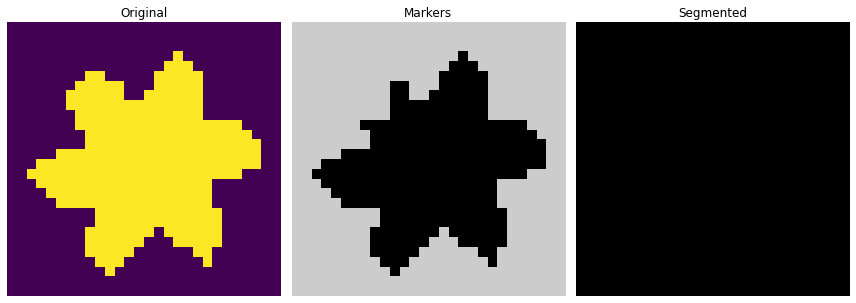

0


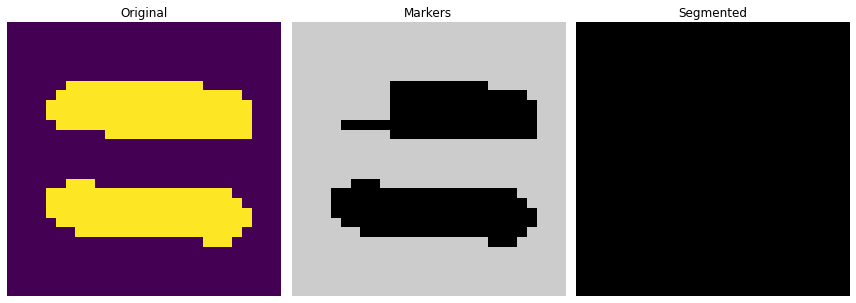

0


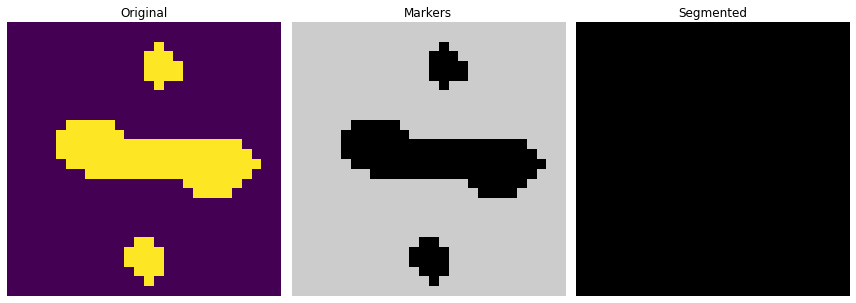

0


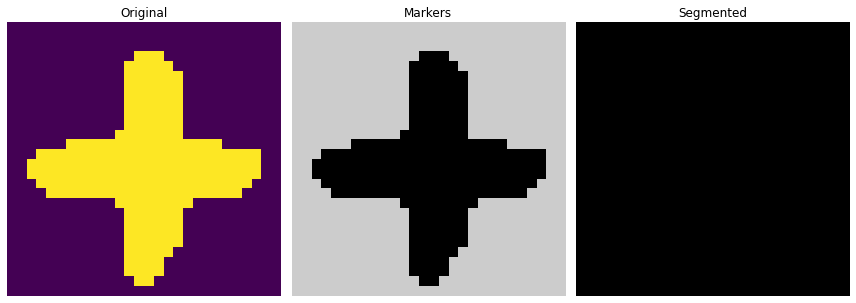

In [87]:
for im in symbols: #for each image
    im_gray = rgb2gray(im)      # convert to grayscale
    denoised = rank.median(img_as_ubyte(im_gray), disk(1))  # denoise image

    # define markers for wateshed : one small rectagle to define background
    # and markers where there is no background. The background is defined as an interval around the mean color of the image
    markers = np.zeros_like(im_gray)
    
                    #!!! maybe use Kmeans to classify the pixels in two classes : background from symbols ? 
    thresh = 0.9    #!!! np.average(im_gray)
    interval = 0.2  #!!! to adjust probably !!!
    markers[im_gray<thresh-interval] = 1
    markers[im_gray>thresh+interval] = 1
    rr, cc = rectangle((0,0), extent=(10,10), shape=markers.shape) #maybe to adjust the shape too
    markers[rr,cc] = 1    
    markers = label(markers)

    edge_sobel = filters.sobel(denoised)     # sobel edges
    labels = watershed(edge_sobel, markers)  # perform the watershed

    nb_obj = np.max(labels)-1
    print(nb_obj)
    
    # display results
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5),
                             sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(im)
    ax[0].set_title("Original")

    ax[1].imshow(markers, cmap=plt.cm.nipy_spectral, alpha=1)
    ax[1].set_title("Markers")

    ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=1)
    ax[2].set_title("Segmented")

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()

In [15]:
markers[10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
def compute_nb_objects(pic, thresh = 0.9, interval = 0.2):
    """
    return nb_object in the picture (background does NOT count as an object)
    also return the total area of the objects
    
    input : the picture is composed of pixel with values between 0 and 1 !!!
    
    """
    if pic.shape[-1] == 4:
        im_gray = np.copy(rgb2gray(rgba2rgb(im)))
    elif pic.shape[-1] == 3:
        im_gray = np.copy(rgb2gray(pic))  # convert to grayscale
    elif len(pic.shape) ==2: 
        im_gray = np.copy(pic)
    else:
        "\n This picture is neither RBGA nor RGB nor greyscale"
        
    denoised = rank.median(img_as_ubyte(im_gray), disk(1))  #denoise image
    # define markers for wateshed : one small rectagle to define background
    # and markers where there is no background. The background is defined as an interval around the mean color of the image
    markers = np.zeros_like(im_gray)
    
                    #!!! maybe use Kmeans to classify the pixels in two classes : background from symbols ? 
    #thresh = 0.9    #!!! np.average(im_gray)
    #interval = 0.2  #!!! to adjust probably !!!
    markers[im_gray<thresh-interval] = 1
    markers[im_gray>thresh+interval] = 1
    area = np.sum(markers==1)
    rr, cc = rectangle((0,0), extent=(20,20), shape=markers.shape) #maybe to adjust the shape too
    markers[rr,cc] = 1    
    markers = label(markers)

    edge_sobel = filters.sobel(denoised)     # sobel edges
    labels = watershed(edge_sobel, markers)  # perform the watershed

    nb_obj = np.max(labels)-1
    return nb_obj, area

In [25]:
for a in symbols:
    print(compute_nb_objects(a))

(1, 20324)
(2, 23251)
(1, 11624)
(3, 13926)
(1, 29320)
